In [1]:
# The code was removed by Watson Studio for sharing.

 ### IBM Advanced Data Science Capstone Project 
 ####  Project Title: Predicting Customers' Chance of Charged-off on Credit Loans
##### Summary
The purpose of this project is to develop a machine learning model for predict the whether a loan will be fully paid or charged off, since a charged off loan results in the loss of both the principal and interest. We obtained data  from the publicly available loan data provided by Lending Club (https://www.lendingclub.com/info/download-data.action). This data comprises information about all loans issued from 2007 to the third quarter of 2018. The initial data for 2007-2017 consists  of 1,765,429 observations and 145 features. A logistics regression and a feed forward neural network using Keras Sequential Model were trained using dataset consisting of 857,607 observations, 132 features. Then, we compared the performance of both the models to select which model to deploy. The logistics regression and neural network achieved accuracies of 0.9986 and 0.9993, respectively. Finally, from the confusion matrix, the deep learning model outperfoms the logistics resgression model. 


### ETL Continued

In [2]:
# The code was removed by Watson Studio for sharing.

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0,19,47,55,112,123,124,125,128,129,130,133) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# check missing data
missing_data = df_data_3.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

id
True     1765428
False          1
Name: id, dtype: int64

member_id
True    1765429
Name: member_id, dtype: int64

loan_amnt
False    1765426
True           3
Name: loan_amnt, dtype: int64

funded_amnt
False    1765426
True           3
Name: funded_amnt, dtype: int64

funded_amnt_inv
False    1765426
True           3
Name: funded_amnt_inv, dtype: int64

term
False    1765426
True           3
Name: term, dtype: int64

int_rate
False    1765426
True           3
Name: int_rate, dtype: int64

installment
False    1765426
True           3
Name: installment, dtype: int64

grade
False    1765426
True           3
Name: grade, dtype: int64

sub_grade
False    1765426
True           3
Name: sub_grade, dtype: int64

emp_title
False    1653116
True      112313
Name: emp_title, dtype: int64

emp_length
False    1660506
True      104923
Name: emp_length, dtype: int64

home_ownership
False    1765426
True           3
Name: home_ownership, dtype: int64

annual_inc
False    1765422
True           7


In [4]:
pd.value_counts(df_data_3.emp_length).to_frame()

,emp_length
10+ years,587623
2 years,158930
< 1 year,146361
3 years,140124
1 year,115236
5 years,108844
4 years,105343
6 years,80651
8 years,75887
7 years,74734


In [5]:
#meta(df_data_3)
df_data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765429 entries, 0 to 1765428
Columns: 145 entries, id to settlement_term
dtypes: float64(106), object(39)
memory usage: 1.9+ GB


In [6]:
#Find the percentage of null in each column
check_null = df_data_3.isnull().sum().sort_values(ascending=False)/len(df_data_3)
#print all with 20% NaNs
print(check_null[check_null > 0.2])

member_id                                     1.000000
url                                           1.000000
id                                            0.999999
orig_projected_additional_accrued_interest    0.995739
hardship_loan_status                          0.994659
hardship_amount                               0.994659
hardship_start_date                           0.994659
hardship_end_date                             0.994659
payment_plan_start_date                       0.994659
hardship_length                               0.994659
hardship_dpd                                  0.994659
hardship_payoff_balance_amount                0.994659
hardship_status                               0.994659
hardship_last_payment_amount                  0.994659
hardship_reason                               0.994659
hardship_type                                 0.994659
deferral_term                                 0.994659
sec_app_mths_since_last_major_derog           0.992316
settlement

In [7]:
# Summary of Data by Loan Status
(pd.value_counts(df_data_3.loan_status)/len(df_data_3)).to_frame().reset_index().rename(columns= {'index':'Loan_Status','loan_status': 'Count'})

,Loan_Status,Count
0,Fully Paid,0.529494
1,Current,0.314388
2,Charged Off,0.134669
3,Late (31-120 days),0.010912
4,In Grace Period,0.006806
5,Late (16-30 days),0.002160
6,Does not meet the credit policy. Status:Fully ...,0.001126
7,Does not meet the credit policy. Status:Charge...,0.000431
8,Default,0.000012


In [8]:
df_1=df_data_3['loan_status'].value_counts().to_frame().reset_index()
df_1= df_1.rename(columns= {'index':'Loan_Status','loan_status': 'Count'})
df_1
#df_1.index.name = 'loan_status' # to change index column name

,Loan_Status,Count
0,Fully Paid,934784
1,Current,555030
2,Charged Off,237749
3,Late (31-120 days),19265
4,In Grace Period,12015
5,Late (16-30 days),3813
6,Does not meet the credit policy. Status:Fully ...,1988
7,Does not meet the credit policy. Status:Charge...,761
8,Default,21


## Pre-processing Data for Modeling

In [9]:
# SELECT THE DATA OF INTEREST
df=df_data_3[(df_data_3.loan_status=='Fully Paid') | (df_data_3.loan_status=='Charged Off') ]

In [10]:
df['loan_status'].value_counts().to_frame().reset_index().rename(columns= {'index':'Loan_Status','loan_status': 'Count'})

,Loan_Status,Count
0,Fully Paid,934784
1,Charged Off,237749


#### Visualize Target Variable

In [11]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0


Matplotlib version:  2.1.0


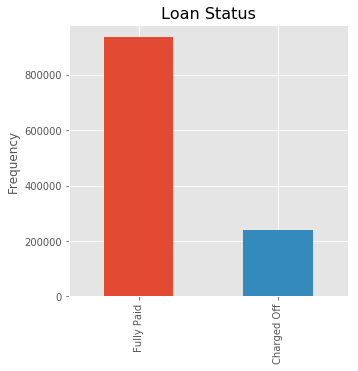

In [12]:
ax=df['loan_status'].value_counts()#/len(df)
# step 2: plot data
ax.plot(kind='bar', figsize=(5, 5))
#plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Frequency') # add y-label to the plot
plt.title('Loan Status', fontsize=16) # add title to the plot

plt.show()

In [13]:
#Find the percentage of null in each column
check_null = df.isnull().sum().sort_values(ascending=False)/len(df)
#print all with 10% NaNs
print(check_null[check_null  > 0.1])
#print(len(check_null[check_null > 0.2]))

id                                            1.000000
member_id                                     1.000000
url                                           1.000000
next_pymnt_d                                  1.000000
orig_projected_additional_accrued_interest    0.997727
sec_app_mths_since_last_major_derog           0.997438
payment_plan_start_date                       0.996361
hardship_type                                 0.996361
hardship_reason                               0.996361
hardship_status                               0.996361
deferral_term                                 0.996361
hardship_amount                               0.996361
hardship_end_date                             0.996361
hardship_start_date                           0.996361
hardship_length                               0.996361
hardship_loan_status                          0.996361
hardship_payoff_balance_amount                0.996361
hardship_last_payment_amount                  0.996361
hardship_d

### Data Cleaning

In [14]:
#Drop all columns with NaN > 20%
df.drop(check_null[check_null>0.2].index, axis=1, inplace=True) 
#df.dropna(axis=0, thresh=20, inplace=True)

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [15]:
# Drop all row with NaN
df_new=df.dropna(axis=0)

In [16]:
df_new.describe(include=['object']).transpose()

,count,unique,top,freq
term,857607,2,36 months,639325
int_rate,857607,291,10.99%,27648
grade,857607,7,C,248619
sub_grade,857607,35,C1,54485
emp_title,857607,267508,Teacher,14952
emp_length,857607,11,10+ years,300957
home_ownership,857607,6,MORTGAGE,443247
verification_status,857607,3,Source Verified,355645
issue_d,857607,65,Oct-15,31493
loan_status,857607,2,Fully Paid,684084


In [17]:
df_new.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,857607.0,14807.932684,8666.141173,1.000000e+03,8000.000,12950.00,20000.000,4.000000e+04
funded_amnt,857607.0,14807.926037,8666.141206,1.000000e+03,8000.000,12950.00,20000.000,4.000000e+04
funded_amnt_inv,857607.0,14801.953169,8663.026811,7.750000e+02,8000.000,12925.00,20000.000,4.000000e+04
installment,857607.0,449.662246,260.693072,4.930000e+00,260.550,387.40,594.800,1.719830e+03
annual_inc,857607.0,78956.278287,70929.916399,1.000000e+02,49000.000,67000.00,95000.000,9.550000e+06
dti,857607.0,18.604874,8.822707,-1.000000e+00,12.390,18.05,24.370,9.990000e+02
delinq_2yrs,857607.0,0.331391,0.889151,0.000000e+00,0.000,0.00,0.000,3.900000e+01
inq_last_6mths,857607.0,0.703877,0.941978,0.000000e+00,0.000,0.00,1.000,8.000000e+00
open_acc,857607.0,12.160725,5.499640,1.000000e+00,8.000,11.00,15.000,9.000000e+01
pub_rec,857607.0,0.223657,0.624074,0.000000e+00,0.000,0.00,0.000,8.600000e+01


**Now, we have to convert interest rate and employment length to float data type. Also, all categorical data with cardinality greater than 50 would be dropped.**

In [18]:
#interest rate is a string. Remove % and make it a float
df_new['int_rate'] = df_new['int_rate'].str.split('%').str[0]
df_new['int_rate'] = df_new.int_rate.astype(float)/100.


/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [19]:
df_new[['purpose','loan_status']].groupby(['purpose','loan_status']).size().to_frame().rename(columns= {0 : 'Count'})

Count
purpose            loan_status        
car                Charged Off    1188
                   Fully Paid     6775
credit_card        Charged Off   32078
                   Fully Paid   155240
debt_consolidation Charged Off  109132
                   Fully Paid   401925
educational        Fully Paid        1
home_improvement   Charged Off    9934
                   Fully Paid    45719
house              Charged Off     922
                   Fully Paid     3202
major_purchase     Charged Off    3327
                   Fully Paid    13724
medical            Charged Off    1983
                   Fully Paid     7029
moving             Charged Off    1366
                   Fully Paid     4273
other              Charged Off    9709
                   Fully Paid    35105
renewable_energy   Charged Off     121
                   Fully Paid      413
small_business     Charged Off    2609
                   Fully Paid     5706
vacation           Charged Off    1051
                   Fully Paid     4380
wedding            Charged Off     103
                   Fully Paid      592

In [20]:
grp=df_new.groupby(['purpose','loan_status'])['loan_status'].count()
grp / grp.groupby(level=0).sum()*100

purpose             loan_status
car                 Charged Off     14.919000
                    Fully Paid      85.081000
credit_card         Charged Off     17.124889
                    Fully Paid      82.875111
debt_consolidation  Charged Off     21.354174
                    Fully Paid      78.645826
educational         Fully Paid     100.000000
home_improvement    Charged Off     17.849891
                    Fully Paid      82.150109
house               Charged Off     22.356935
                    Fully Paid      77.643065
major_purchase      Charged Off     19.512052
                    Fully Paid      80.487948
medical             Charged Off     22.003995
                    Fully Paid      77.996005
moving              Charged Off     24.224153
                    Fully Paid      75.775847
other               Charged Off     21.665105
                    Fully Paid      78.334895
renewable_energy    Charged Off     22.659176
                    Fully Paid      77.340824
sm

In [21]:
# recode employment length
emp_len={'< 1 year':0,'1 year':1,'2 years':2,'3 years':3,'4 years':4,'5 years':5,'6 years':6,'7 years':7,'8 years':8,'9 years':9,'10+ years':10}
df_new.emp_length.replace(emp_len,inplace=True)
df_new.emp_length.unique()

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


array([ 2, 10,  7,  4,  5,  3,  6,  1,  8,  9,  0])

In [22]:
# Delete column of categorical data with higher cadinality
del_cols=['emp_title','issue_d','title','zip_code','addr_state','earliest_cr_line', \
        'revol_util','initial_list_status','last_pymnt_d','last_credit_pull_d']

df_new.drop(del_cols , axis=1, inplace=True) 

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Feature Engineering

In [23]:
# CREATE DUMMY VARIABLES FOR CATEGORICAL DATA
cat_features = ['term','grade','sub_grade','home_ownership','verification_status', \
            'pymnt_plan','purpose','application_type','hardship_flag', \
            'disbursement_method','debt_settlement_flag']
data= pd.get_dummies(df_new,columns=cat_features, drop_first=True)

In [24]:
data.describe(include=['object']).transpose()

,count,unique,top,freq
loan_status,857607,2,Fully Paid,684084


In [25]:
data.shape

(857607, 132)

### Saving Clean Data to Object Storage and Ready for Modeling

In [ ]:
# Save dataframe as csv file to storage
project.save_data(data=data.to_csv(index=False),file_name='dataset.csv',overwrite=True)

### Keras Deep Learning 

Using the Keras Sequential Model,  We will build a Feed Forward Neural Network. First, we load the cleaned dataset and training a Neural Network feeding the network the features and the label class.

Now, we first import the required packages.

In [26]:
import pip

try:
    __import__('keras')
except ImportError:
    pip.main(['install', 'keras']) 
    
try:
    __import__('h5py')
except ImportError:
    pip.main(['install', 'h5py']) 

import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils

seed = 100
np.random.seed(seed)

Using TensorFlow backend.


### Load the data into a pandas dataframe and Split into Features and Labels

In [27]:
body = client_bdc1578e6f6540e7b1fcdd8468fc945c.get_object(Bucket='ibmadvanceddatasciencecapstone-donotdelete-pr-qegyxjwgs1xkix',Key='dataset.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df= pd.read_csv(body)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,...,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_Joint App,hardship_flag_Y,disbursement_method_DirectPay,debt_settlement_flag_Y
0,8000.0,8000.0,8000.0,0.1099,261.88,2,33000.0,Charged Off,15.75,0.0,...,0,0,0,0,0,0,0,0,0,0
1,20800.0,20800.0,20800.0,0.1353,706.16,10,81500.0,Fully Paid,16.73,0.0,...,0,0,0,0,0,0,0,0,0,0
2,10000.0,10000.0,10000.0,0.0967,321.13,7,102000.0,Fully Paid,15.55,2.0,...,0,0,0,0,0,0,0,0,0,0
3,11500.0,11500.0,11500.0,0.2290,323.54,4,32760.0,Fully Paid,27.06,0.0,...,0,0,0,0,0,0,0,0,0,0
4,15000.0,15000.0,15000.0,0.0890,476.30,2,63000.0,Fully Paid,16.51,0.0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
features=df.drop('loan_status', axis=1)

In [29]:
# encode Target values as integers
encoder = LabelEncoder()
encoder.fit(df['loan_status'])
encoded_Y = encoder.transform(df['loan_status'])

# convert integers to dummy variables (hot encoded)
Target = np_utils.to_categorical(encoded_Y)
#print(Target)

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, Target, test_size=0.20, random_state=1)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((686085, 131), (686085, 2), (171522, 131), (171522, 2))

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [32]:
# Now apply the transformations to the data:
sd_train = scaler.transform(x_train)

In [33]:
# Now apply the scale the test data:
sd_test = scaler.transform(x_test)

### Build a model

In [34]:
# create model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=131))
model.add(Dense(2, activation='sigmoid')) 

### Complie and Train the Model

In [35]:
#model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(sd_train, y_train, epochs=20, batch_size=128)

Epoch 1/20
686085/686085 [==============================] - 8s 12us/step - loss: 0.0324 - acc: 0.9895
Epoch 2/20
686085/686085 [==============================] - 8s 12us/step - loss: 0.0094 - acc: 0.9977
Epoch 3/20
686085/686085 [==============================] - 8s 12us/step - loss: 0.0076 - acc: 0.9982
Epoch 4/20
686085/686085 [==============================] - 8s 12us/step - loss: 0.0063 - acc: 0.9984
Epoch 5/20
686085/686085 [==============================] - 8s 12us/step - loss: 0.0055 - acc: 0.9987
Epoch 6/20
686085/686085 [==============================] - 8s 12us/step - loss: 0.0052 - acc: 0.9987
Epoch 7/20
686085/686085 [==============================] - 8s 12us/step - loss: 0.0052 - acc: 0.9987
Epoch 8/20
686085/686085 [==============================] - 8s 12us/step - loss: 0.0048 - acc: 0.9988
Epoch 9/20
686085/686085 [==============================] - 8s 12us/step - loss: 0.0044 - acc: 0.9989
Epoch 10/20
686085/686085 [==============================] - 8s 12us/step - loss: 

In [36]:
predictions = model.predict(sd_test)

In [37]:
score = model.evaluate(sd_test, y_test, batch_size=128)
score

171522/171522 [==============================] - 1s 6us/step


[0.0062461124117205377, 0.9987231958582572]

In [38]:
#encoder.inverse_transform((y_test) as integer)
y_classes = [np.argmax(y, axis=None, out=None) for y in y_test]
y_classtt= [np.argmax(y, axis=None, out=None) for y in predictions]

In [51]:
#model.metrics_names
from sklearn.metrics import classification_report
target_names=['Charged Off', 'Fully Paid']
print(classification_report(y_classes, y_classtt,target_names=target_names,digits=4))

             precision    recall  f1-score   support

Charged Off     0.9979    0.9958    0.9969     34814
 Fully Paid     0.9989    0.9995    0.9992    136708

avg / total     0.9987    0.9987    0.9987    171522



In [41]:
from sklearn.metrics import confusion_matrix
import pandas as pd

confusion_df = pd.DataFrame(confusion_matrix(y_classes,y_classtt),
             columns=["Predicted " + str(class_name) for class_name in ['Charged Off','Fully Paid']],
             index = [class_name for class_name in ['Charged Off','Fully Paid']])

confusion_df

,Predicted Charged Off,Predicted Fully Paid
Charged Off,34669,145
Fully Paid,74,136634


### Logistic Regression Model

In [42]:
# Recoding loan_status for logistic Regression 
y=df['loan_status'].replace(to_replace=['Fully Paid', 'Charged Off'], value=[0, 1])

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, y, test_size=0.20, random_state=1)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((686085, 131), (686085,), (171522, 131), (171522,))

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [45]:
# Now apply the transformations to the data:
sd_train = scaler.transform(x_train)
sd_test = scaler.transform(x_test)

In [46]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(sd_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
y_pred = logistic.predict(sd_test)

#### Logistic Regression Model Performance

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.99868821492286708

### Creating Confusion Matrix

In [49]:
from sklearn.metrics import confusion_matrix
import pandas as pd

confusion_df = pd.DataFrame(confusion_matrix(y_test,y_pred),
             columns=["Predicted " + str(class_name) for class_name in ['Fully Paid', 'Charged Off']],
             index = [class_name for class_name in ['Fully Paid', 'Charged Off']])

confusion_df

,Predicted Fully Paid,Predicted Charged Off
Fully Paid,136708,0
Charged Off,225,34589


In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,target_names=['Fully Paid', 'Charged Off'],digits=4))

             precision    recall  f1-score   support

 Fully Paid     0.9984    1.0000    0.9992    136708
Charged Off     1.0000    0.9935    0.9968     34814

avg / total     0.9987    0.9987    0.9987    171522



### Conclusion
In this project, we develop models to predict chance of a customer charging off on a crdeit loan. We trained a logistics regression and neural network model and the models achieved accuracies of 0.9986 and 0.9993, respectively. From the confusion matrix, the deep learning model outperfoms the logistics resgression model. But I will recommend logistics regression because its easier to explain the model's decision while its practically difficult to provide reason for deep learning model's choice.